In [3]:
import os
import matplotlib.pyplot as plt
from keras import Sequential
from keras.utils import image_dataset_from_directory
from keras.layers import Dense,Flatten,Dropout
from keras.applications import EfficientNetV2B0
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.callbacks import Callback

In [4]:

parent_dir='C:/Users/Corrupted/Desktop/OUTPUT'
train_dir = os.path.join(parent_dir,'train')
test_dir = os.path.join(parent_dir,'test')
val_dir = os.path.join(parent_dir,'val')

In [5]:
class_name = []
for image_class in os.listdir(train_dir):
    class_name.append(image_class)
print(class_name)
print(f'Total class_name: {len(class_name)}')


['high', 'low', 'medium', 'very-high', 'very-low']
Total class_name: 5


In [6]:
train_data = image_dataset_from_directory(train_dir, label_mode="categorical",
                                          image_size=(224, 224), batch_size=32,
                                          shuffle=True, seed=42)
test_data = image_dataset_from_directory(test_dir, label_mode="categorical",
                                         image_size=(224, 224), batch_size=32,
                                         shuffle=False, seed=42)
val_data = image_dataset_from_directory(val_dir, label_mode="categorical",
                                        image_size=(224, 224), batch_size=32,
                                        shuffle=False, seed=42)

Found 43905 files belonging to 5 classes.
Found 6276 files belonging to 5 classes.
Found 12543 files belonging to 5 classes.


In [7]:
n_class = len(class_name)
model = Sequential()
pretrained_model = EfficientNetV2B0(include_top=False,
                                                  input_shape=(224, 224, 3),
                                                  pooling='avg', classes=n_class-2,
                                                  weights='imagenet',classifier_activation='softmax')

for layer in pretrained_model.layers:
    layer.trainable = False

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_class, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, 1280)             5919312   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                        

In [8]:
model.compile(loss=CategoricalCrossentropy(label_smoothing=0.1),
              optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])


In [9]:
hist = model.fit(train_data, epochs=33, validation_data=val_data,
                 callbacks=Callback())

Epoch 1/33
1373/1373 [==============================] - 1154s 835ms/step - loss: 1.0886 - accuracy: 0.6079 - val_loss: 0.9259 - val_accuracy: 0.6937
Epoch 2/33
1373/1373 [==============================] - 1150s 836ms/step - loss: 0.9770 - accuracy: 0.6892 - val_loss: 0.9063 - val_accuracy: 0.7245
Epoch 3/33
1373/1373 [==============================] - 1142s 831ms/step - loss: 0.9544 - accuracy: 0.7017 - val_loss: 0.8670 - val_accuracy: 0.7454
Epoch 4/33
1373/1373 [==============================] - 1129s 821ms/step - loss: 0.9434 - accuracy: 0.7112 - val_loss: 0.8627 - val_accuracy: 0.7397
Epoch 5/33
1373/1373 [==============================] - 1130s 822ms/step - loss: 0.9327 - accuracy: 0.7154 - val_loss: 0.8464 - val_accuracy: 0.7485
Epoch 6/33
1373/1373 [==============================] - 1131s 823ms/step - loss: 0.9389 - accuracy: 0.7117 - val_loss: 0.8888 - val_accuracy: 0.7407
Epoch 7/33
1373/1373 [==============================] - 1135s 826ms/step - loss: 0.9193 - accuracy: 0.7237

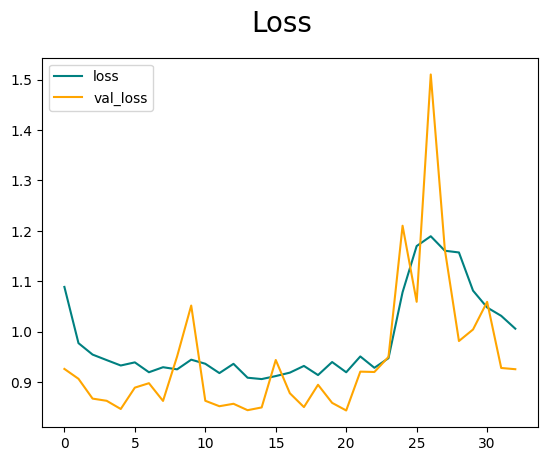

In [10]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

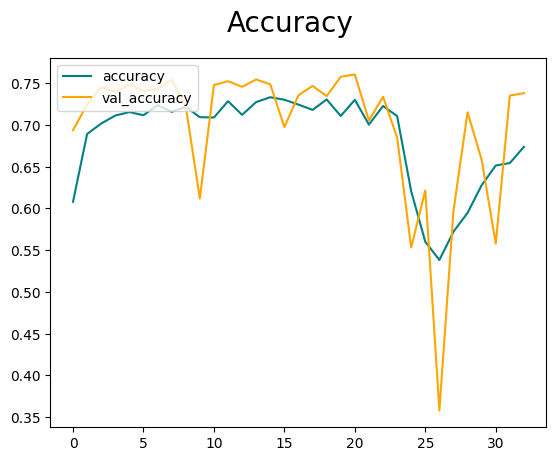

In [11]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [12]:
print(f"Training Accuracy: {hist.history['accuracy'][-1]}")
print(f"Validation Accuracy: {hist.history['val_accuracy'][-1]}")

Training Accuracy: 0.6737501621246338
Validation Accuracy: 0.7381009459495544


In [13]:
test_loss, test_acc = model.evaluate(test_data)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_acc}')

197/197 [==============================] - 125s 633ms/step - loss: 0.9249 - accuracy: 0.7363
Test Loss: 0.9249166250228882
Test Accuracy: 0.7362970113754272


In [14]:
import time
times=time.strftime("%Y%m%d-%H%M%S")
print(times)

20230304-121542
